# Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import seaborn as sns


# --- LOAD DATA ---

In [ ]:
from google.colab import files
uploaded = files.upload()

# Ambil nama file yang diupload (asumsi hanya satu file)
filename = list(uploaded.keys())[0]

# Baca file CSV ke dataframe
import pandas as pd
df = pd.read_csv(filename)

print(f"File '{filename}' berhasil diupload dan dibaca.")
print(f"Jumlah baris dan kolom data: {df.shape}")

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
File 'healthcare-dataset-stroke-data.csv' berhasil diupload dan dibaca.
Jumlah baris dan kolom data: (5110, 12)


In [ ]:
print("=== Distribusi Data Awal ===")
total_data = df.shape[0]  # jumlah baris, bukan kolom
print(f"Total data (jumlah baris): {total_data}")

# Cek apakah kolom 'stroke' ada di dataset
if 'stroke' in df.columns:
    label_counts = df['stroke'].value_counts(dropna=False)
    print("\nDistribusi label kolom 'stroke':")
    print(label_counts)
    print("\nPersentase label stroke:")
    print(round(label_counts / total_data * 100, 2))

    # Membalik label stroke (jika memang perlu dibalik)
    # Ini opsional, jangan dibalik kalau label asli sudah benar
    df['stroke_flipped'] = df['stroke'].apply(lambda x: 1 if x == 0 else 0)

    flipped_counts = df['stroke_flipped'].value_counts(dropna=False)
    print("\nDistribusi label kolom 'stroke' setelah dibalik:")
    print(flipped_counts)
    print("\nPersentase label stroke setelah dibalik:")
    print(round(flipped_counts / total_data * 100, 2))

else:
    print("Kolom 'stroke' tidak ditemukan di dataset.")



=== Distribusi Data Awal ===
Total data (jumlah baris): 5110

Distribusi label kolom 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Persentase label stroke:
stroke
0    95.13
1     4.87
Name: count, dtype: float64

Distribusi label kolom 'stroke' setelah dibalik:
stroke_flipped
1    4861
0     249
Name: count, dtype: int64

Persentase label stroke setelah dibalik:
stroke_flipped
1    95.13
0     4.87
Name: count, dtype: float64


# --- CEK KOLOM ---

In [ ]:
print("\nDaftar kolom:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")


Daftar kolom:
0: id
1: gender
2: age
3: hypertension
4: heart_disease
5: ever_married
6: work_type
7: Residence_type
8: avg_glucose_level
9: bmi
10: smoking_status
11: stroke
12: stroke_flipped


# --- DEFINISI KOLOM FITUR DAN LABEL ---


In [ ]:
# Sesuaikan daftar fitur numerik yang relevan untuk clustering
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Nama kolom label stroke, harus ada di dataset
label_col = 'stroke_flipped'

if label_col not in df.columns:
    raise ValueError(f"Kolom label '{label_col}' tidak ditemukan di dataset!")

print(f"\nMenggunakan kolom label '{label_col}' sebagai target.")


Menggunakan kolom label 'stroke_flipped' sebagai target.


# --- EKSPLORASI DATA ---

In [ ]:
print("\nStatistik deskriptif fitur numerik:")
print(df[numerical_cols].describe())

print("\nDistribusi label stroke:")
print(df[label_col].value_counts())



Statistik deskriptif fitur numerik:
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi  
count  4909.000000  
mean     28.893237  
std       7.854067  
min      10.300000  
25%      23.500000  
50%      28.100000  
75%      33.100000  
max      97.600000  

Distribusi label stroke:
stroke_flipped
1    4861
0     249
Name: count, dtype: int64


# Visualisasi distribusi fitur numerik

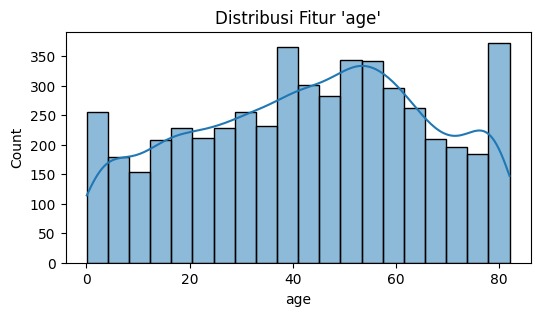

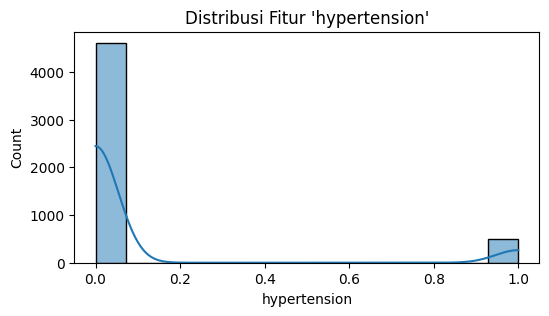

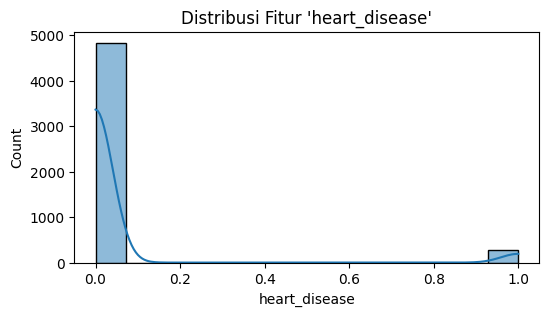

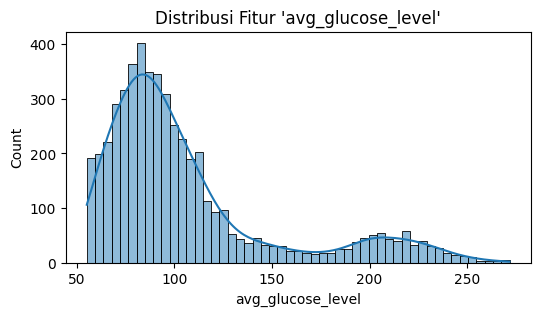

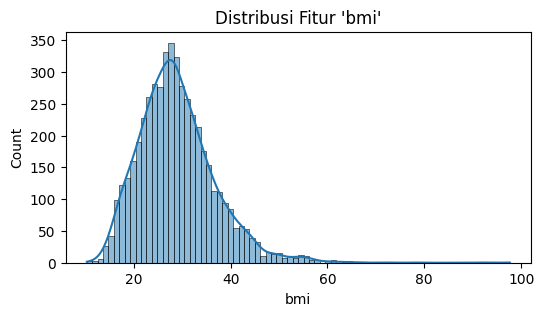

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribusi Fitur '{col}'")
    plt.xlabel(col)
    plt.show()

# Visualisasi distribusi label stroke

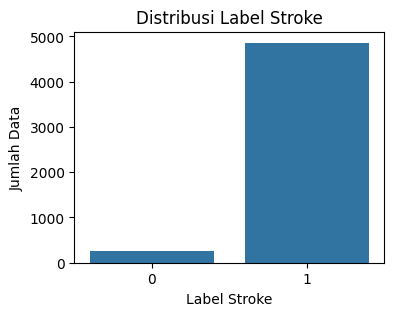

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df[label_col], order=[0, 1])
plt.title("Distribusi Label Stroke")
plt.xlabel("Label Stroke")
plt.ylabel("Jumlah Data")
plt.show()


# --- PRA-PROSES DATA ---

In [ ]:
print("\n=== Pra-proses Data ===")

# Pisahkan fitur (X) dan label (y)
X = df[numerical_cols]
y = df[label_col]

print(f"Shape X (fitur): {X.shape}")
print(f"Shape y (label): {y.shape}")

# Gabungkan X dan y untuk drop missing value secara serempak supaya sinkron
df_combined = pd.concat([X, y], axis=1)
df_clean = df_combined.dropna()

print(f"Setelah drop missing values: {df_clean.shape[0]} baris tersisa")

# Pisahkan ulang X dan y yang sudah bersih
X_clean = df_clean[numerical_cols]
y_clean = df_clean[label_col]

# Menampilkan jumlah label 0 dan 1 setelah data dibersihkan
label_counts = y_clean.value_counts()
print(f"Jumlah label setelah drop missing values: {label_counts[0]} untuk label 0, {label_counts[1]} untuk label 1")

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("Pra-proses data selesai. Data siap untuk clustering.\n")



=== Pra-proses Data ===
Shape X (fitur): (5110, 5)
Shape y (label): (5110,)
Setelah drop missing values: 4909 baris tersisa
Jumlah label setelah drop missing values: 209 untuk label 0, 4700 untuk label 1
Pra-proses data selesai. Data siap untuk clustering.



# --- CLUSTERING ---

In [ ]:
random_state_val = 2025
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state_val)
kmeans_labels = kmeans.fit_predict(X_scaled)

eps_val = 3.5
min_samples_val = 3
dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
dbscan_labels = dbscan.fit_predict(X_scaled)

# K-Means

In [ ]:
# --- K-Means ---
n_clusters = 2
random_state_val = 42

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state_val)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Membalik label 0 dan 1 pada K-Means
kmeans_labels_flipped = np.where(kmeans_labels == 0, 1, 0)

print("Distribusi cluster K-Means setelah dibalik:")
print(pd.Series(kmeans_labels_flipped).value_counts())

Distribusi cluster K-Means setelah dibalik:
1    4273
0     636
Name: count, dtype: int64


# DBSCAN

In [ ]:
# --- DBSCAN ---
eps_val = 3.5
min_samples_val = 3

# DBSCAN Clustering
dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("Distribusi cluster DBSCAN (noise = -1):")
print(pd.Series(dbscan_labels).value_counts())

Distribusi cluster DBSCAN (noise = -1):
1    4666
0     243
Name: count, dtype: int64


# --- EVALUASI CLUSTERING ---

# Silhouette Score

In [ ]:
# Silhouette Score untuk K-Means
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
# Silhouette Score untuk DBSCAN hanya pada non-noise points
sil_dbscan = silhouette_score (X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Silhouette Score K-Means: {sil_kmeans:.4f}")
print(f"Silhouette Score DBSCAN (non-noise): {sil_dbscan:.4f}")


Silhouette Score K-Means: 0.5154
Silhouette Score DBSCAN (non-noise): 0.5657



=== KMEANS MANUAL ===
Actual 0: 209, Actual 1: 4700
Pred 0: 636, Pred 1: 4273
TN: 89, FP: 120, FN: 547, TP: 4153
Akurasi KMEANS manual: 0.8641


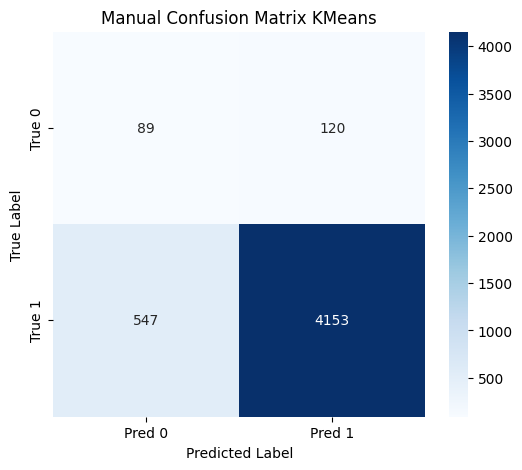

In [ ]:
# --- KMEANS MANUAL ---

y_true_kmeans = y_clean
y_pred_kmeans = kmeans_labels_flipped

actual_0_kmeans = np.sum(y_true_kmeans == 0)
actual_1_kmeans = np.sum(y_true_kmeans == 1)

pred_0_kmeans = np.sum(y_pred_kmeans == 0)
pred_1_kmeans = np.sum(y_pred_kmeans == 1)

TN_kmeans = 0
FP_kmeans = 0
FN_kmeans = 0
TP_kmeans = 0

for actual, pred in zip(y_true_kmeans, y_pred_kmeans):
    if actual == 0 and pred == 0:
        TN_kmeans += 1
    elif actual == 0 and pred == 1:
        FP_kmeans += 1
    elif actual == 1 and pred == 0:
        FN_kmeans += 1
    elif actual == 1 and pred == 1:
        TP_kmeans += 1

print(f"\n=== KMEANS MANUAL ===")
print(f"Actual 0: {actual_0_kmeans}, Actual 1: {actual_1_kmeans}")
print(f"Pred 0: {pred_0_kmeans}, Pred 1: {pred_1_kmeans}")
print(f"TN: {TN_kmeans}, FP: {FP_kmeans}, FN: {FN_kmeans}, TP: {TP_kmeans}")

total_kmeans = TN_kmeans + FP_kmeans + FN_kmeans + TP_kmeans
accuracy_kmeans_manual = (TN_kmeans + TP_kmeans) / total_kmeans
print(f"Akurasi KMEANS manual: {accuracy_kmeans_manual:.4f}")

cm_kmeans_manual = np.array([[TN_kmeans, FP_kmeans],
                             [FN_kmeans, TP_kmeans]])

plt.figure(figsize=(6,5))
sns.heatmap(cm_kmeans_manual, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('Manual Confusion Matrix KMeans')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Distribusi label asli:
Label 0: 209
Label 1: 4700

Distribusi label K-Means (setelah pembalikan):
Label 0: 636
Label 1: 4273

Distribusi label DBSCAN (non-noise):
Label 0: 243
Label 1: 4666

Adjusted Rand Index K-Means vs Label asli: 0.1312
Adjusted Rand Index DBSCAN vs Label asli (non-noise): 0.1261

Akurasi K-Means vs Label asli: 0.8641
Akurasi DBSCAN vs Label asli (non-noise): 0.9242

Confusion Matrix K-Means (manual):
True Negative (TN): 89
False Positive (FP): 120
False Negative (FN): 547
True Positive (TP): 4153


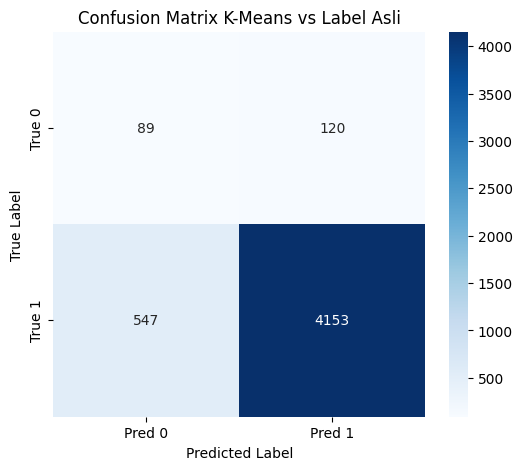


Confusion Matrix DBSCAN (manual):
True Negative (TN): 40
False Positive (FP): 169
False Negative (FN): 203
True Positive (TP): 4497


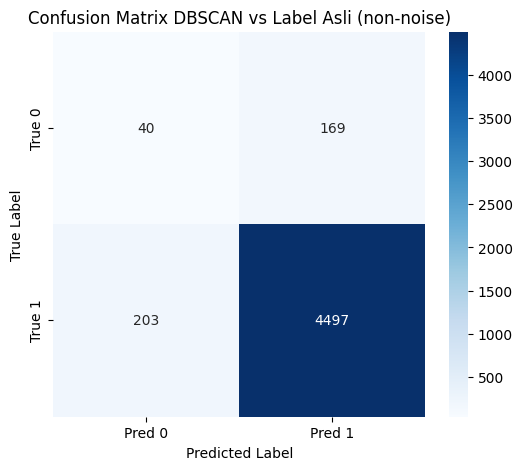


Classification Report K-Means vs Label asli:
              precision    recall  f1-score   support

           0       0.14      0.43      0.21       209
           1       0.97      0.88      0.93      4700

    accuracy                           0.86      4909
   macro avg       0.56      0.65      0.57      4909
weighted avg       0.94      0.86      0.90      4909


Classification Report DBSCAN vs Label asli (non-noise):
              precision    recall  f1-score   support

           0       0.16      0.19      0.18       209
           1       0.96      0.96      0.96      4700

    accuracy                           0.92      4909
   macro avg       0.56      0.57      0.57      4909
weighted avg       0.93      0.92      0.93      4909



In [ ]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cek distribusi label asli ---
print("\nDistribusi label asli:")
print(f"Label 0: {y_clean.value_counts().get(0, 0)}")
print(f"Label 1: {y_clean.value_counts().get(1, 0)}")

# --- Cek distribusi label K-Means (setelah pembalikan) ---
print("\nDistribusi label K-Means (setelah pembalikan):")
print(f"Label 0: {pd.Series(kmeans_labels_flipped).value_counts().get(0, 0)}")
print(f"Label 1: {pd.Series(kmeans_labels_flipped).value_counts().get(1, 0)}")

# --- Cek distribusi label DBSCAN (non-noise) ---
mask_dbscan = dbscan_labels != -1  # Memilih hanya data non-noise untuk DBSCAN
print("\nDistribusi label DBSCAN (non-noise):")
print(f"Label 0: {pd.Series(dbscan_labels[mask_dbscan]).value_counts().get(0, 0)}")
print(f"Label 1: {pd.Series(dbscan_labels[mask_dbscan]).value_counts().get(1, 0)}")

# --- ARI (Adjusted Rand Index) ---
ari_kmeans = adjusted_rand_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
ari_dbscan = adjusted_rand_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"\nAdjusted Rand Index K-Means vs Label asli: {ari_kmeans:.4f}")
print(f"Adjusted Rand Index DBSCAN vs Label asli (non-noise): {ari_dbscan:.4f}")

# --- Akurasi ---
acc_kmeans = accuracy_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
acc_dbscan = accuracy_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"\nAkurasi K-Means vs Label asli: {acc_kmeans:.4f}")
print(f"Akurasi DBSCAN vs Label asli (non-noise): {acc_dbscan:.4f}")

# --- Confusion Matrix K-Means ---
cm_kmeans = confusion_matrix(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
TN, FP, FN, TP = cm_kmeans.ravel()

# Print confusion matrix untuk K-Means
print(f"\nConfusion Matrix K-Means (manual):")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

# Plot dengan heatmap untuk K-Means
plt.figure(figsize=(6,5))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix K-Means vs Label Asli')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Confusion Matrix DBSCAN (non-noise) ---
cm_dbscan = confusion_matrix(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
TN, FP, FN, TP = cm_dbscan.ravel()

# Print confusion matrix untuk DBSCAN
print(f"\nConfusion Matrix DBSCAN (manual):")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

# Plot dengan heatmap untuk DBSCAN
plt.figure(figsize=(6,5))
sns.heatmap(cm_dbscan, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix DBSCAN vs Label Asli (non-noise)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Precision, Recall, F1-Score for K-Means ---
print("\nClassification Report K-Means vs Label asli:")
print(classification_report(y_clean, kmeans_labels_flipped))  # Gunakan kmeans_labels_flipped

# --- Precision, Recall, F1-Score for DBSCAN (non-noise) ---
print("\nClassification Report DBSCAN vs Label asli (non-noise):")
print(classification_report(y_clean[mask_dbscan], dbscan_labels[mask_dbscan]))  # Evaluasi DBSCAN hanya pada non-noise



Distribusi label asli:
Label 0: 209
Label 1: 4700

Distribusi label K-Means (setelah pembalikan):
Label 0: 636
Label 1: 4273

Distribusi label DBSCAN (non-noise):
Label 0: 243
Label 1: 4666

Adjusted Rand Index K-Means vs Label asli: 0.1312
Adjusted Rand Index DBSCAN vs Label asli (non-noise): 0.1261

Akurasi K-Means vs Label asli: 0.8641
Akurasi DBSCAN vs Label asli (non-noise): 0.9242


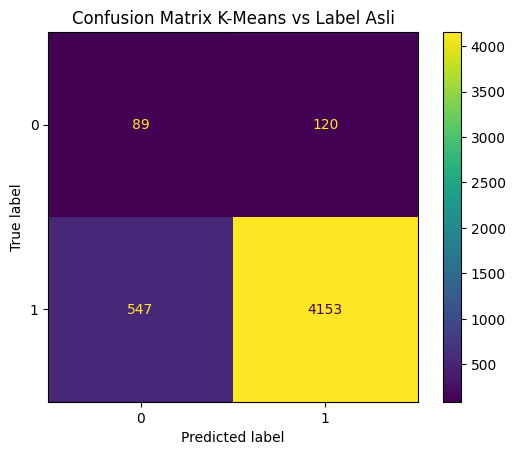

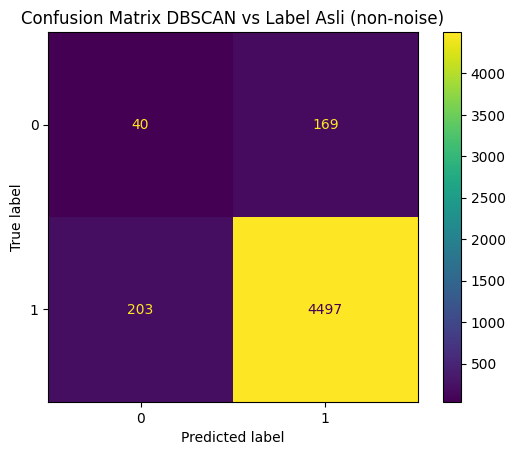


Classification Report K-Means vs Label asli:
              precision    recall  f1-score   support

           0       0.14      0.43      0.21       209
           1       0.97      0.88      0.93      4700

    accuracy                           0.86      4909
   macro avg       0.56      0.65      0.57      4909
weighted avg       0.94      0.86      0.90      4909


Classification Report DBSCAN vs Label asli (non-noise):
              precision    recall  f1-score   support

           0       0.16      0.19      0.18       209
           1       0.96      0.96      0.96      4700

    accuracy                           0.92      4909
   macro avg       0.56      0.57      0.57      4909
weighted avg       0.93      0.92      0.93      4909



In [ ]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Cek distribusi label asli ---
print("\nDistribusi label asli:")
print(f"Label 0: {y_clean.value_counts().get(0, 0)}")
print(f"Label 1: {y_clean.value_counts().get(1, 0)}")

# --- Cek distribusi label K-Means (setelah pembalikan) ---
print("\nDistribusi label K-Means (setelah pembalikan):")
print(f"Label 0: {pd.Series(kmeans_labels_flipped).value_counts().get(0, 0)}")
print(f"Label 1: {pd.Series(kmeans_labels_flipped).value_counts().get(1, 0)}")

# --- Cek distribusi label DBSCAN (non-noise) ---
mask_dbscan = dbscan_labels != -1  # Memilih hanya data non-noise untuk DBSCAN
print("\nDistribusi label DBSCAN (non-noise):")
print(f"Label 0: {pd.Series(dbscan_labels[mask_dbscan]).value_counts().get(0, 0)}")
print(f"Label 1: {pd.Series(dbscan_labels[mask_dbscan]).value_counts().get(1, 0)}")

# --- ARI (Adjusted Rand Index) ---
ari_kmeans = adjusted_rand_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
ari_dbscan = adjusted_rand_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"\nAdjusted Rand Index K-Means vs Label asli: {ari_kmeans:.4f}")
print(f"Adjusted Rand Index DBSCAN vs Label asli (non-noise): {ari_dbscan:.4f}")

# --- Akurasi ---
acc_kmeans = accuracy_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
acc_dbscan = accuracy_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"\nAkurasi K-Means vs Label asli: {acc_kmeans:.4f}")
print(f"Akurasi DBSCAN vs Label asli (non-noise): {acc_dbscan:.4f}")

# --- Confusion Matrix K-Means ---
cm_kmeans = confusion_matrix(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
disp_km = ConfusionMatrixDisplay(cm_kmeans)
disp_km.plot()
plt.title("Confusion Matrix K-Means vs Label Asli")
plt.show()

# --- Confusion Matrix DBSCAN (non-noise) ---
cm_dbscan = confusion_matrix(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
disp_db = ConfusionMatrixDisplay(cm_dbscan)
disp_db.plot()
plt.title("Confusion Matrix DBSCAN vs Label Asli (non-noise)")
plt.show()

# --- Precision, Recall, F1-Score for K-Means ---
print("\nClassification Report K-Means vs Label asli:")
print(classification_report(y_clean, kmeans_labels_flipped))  # Gunakan kmeans_labels_flipped

# --- Precision, Recall, F1-Score for DBSCAN (non-noise) ---
print("\nClassification Report DBSCAN vs Label asli (non-noise):")
print(classification_report(y_clean[mask_dbscan], dbscan_labels[mask_dbscan]))  # Evaluasi DBSCAN hanya pada non-noise


# Evaluasi dengan label asli


Adjusted Rand Index K-Means vs Label asli: 0.1312
Adjusted Rand Index DBSCAN vs Label asli (non-noise): 0.1261
Akurasi K-Means vs Label asli: 0.8641
Akurasi DBSCAN vs Label asli (non-noise): 0.9242


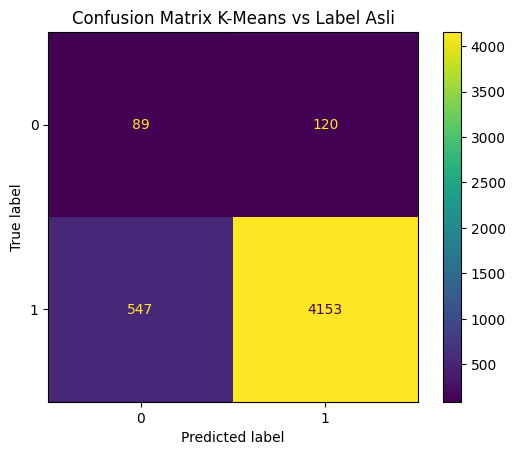

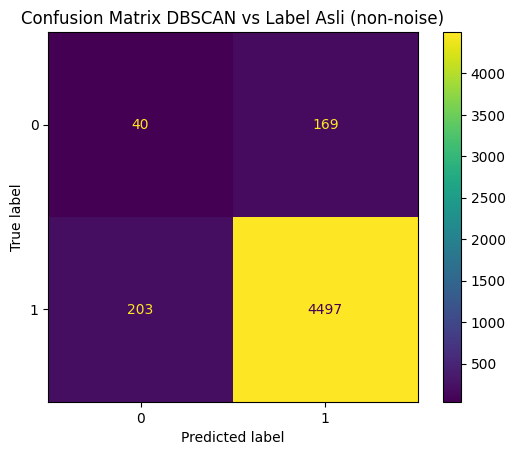


Classification Report K-Means vs Label asli:
              precision    recall  f1-score   support

           0       0.14      0.43      0.21       209
           1       0.97      0.88      0.93      4700

    accuracy                           0.86      4909
   macro avg       0.56      0.65      0.57      4909
weighted avg       0.94      0.86      0.90      4909


Classification Report DBSCAN vs Label asli (non-noise):
              precision    recall  f1-score   support

           0       0.16      0.19      0.18       209
           1       0.96      0.96      0.96      4700

    accuracy                           0.92      4909
   macro avg       0.56      0.57      0.57      4909
weighted avg       0.93      0.92      0.93      4909



In [ ]:
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Pastikan kita menyiapkan mask untuk non-noise points (DBSCAN) ---
mask_dbscan = dbscan_labels != -1  # Memilih hanya data non-noise untuk DBSCAN

# --- ARI (Adjusted Rand Index) ---
# Pastikan menggunakan kmeans_labels_flipped untuk K-Means
ari_kmeans = adjusted_rand_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
ari_dbscan = adjusted_rand_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"Adjusted Rand Index K-Means vs Label asli: {ari_kmeans:.4f}")
print(f"Adjusted Rand Index DBSCAN vs Label asli (non-noise): {ari_dbscan:.4f}")

# --- Akurasi ---
acc_kmeans = accuracy_score(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
acc_dbscan = accuracy_score(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
print(f"Akurasi K-Means vs Label asli: {acc_kmeans:.4f}")
print(f"Akurasi DBSCAN vs Label asli (non-noise): {acc_dbscan:.4f}")

# --- Confusion Matrix K-Means ---
cm_kmeans = confusion_matrix(y_clean, kmeans_labels_flipped)  # Gunakan kmeans_labels_flipped
disp_km = ConfusionMatrixDisplay(cm_kmeans)
disp_km.plot()
plt.title("Confusion Matrix K-Means vs Label Asli")
plt.show()

# --- Confusion Matrix DBSCAN (non-noise) ---
cm_dbscan = confusion_matrix(y_clean[mask_dbscan], dbscan_labels[mask_dbscan])  # Evaluasi DBSCAN hanya pada non-noise
disp_db = ConfusionMatrixDisplay(cm_dbscan)
disp_db.plot()
plt.title("Confusion Matrix DBSCAN vs Label Asli (non-noise)")
plt.show()

# --- Precision, Recall, F1-Score for K-Means ---
print("\nClassification Report K-Means vs Label asli:")
print(classification_report(y_clean, kmeans_labels_flipped))  # Gunakan kmeans_labels_flipped

# --- Precision, Recall, F1-Score for DBSCAN (non-noise) ---
print("\nClassification Report DBSCAN vs Label asli (non-noise):")
print(classification_report(y_clean[mask_dbscan], dbscan_labels[mask_dbscan]))  # Evaluasi DBSCAN hanya pada non-noise



# --- VISUALISASI CLUSTER DENGAN PCA ---

<ipython-input-17-cf12ce7a8668>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter([], [], c=plt.cm.viridis(label / max(dbscan_labels) if max(dbscan_labels) > 0 else 0.5), alpha=0.7, label=f'Cluster {label}') # Tambahkan check for max(dbscan_labels) > 0


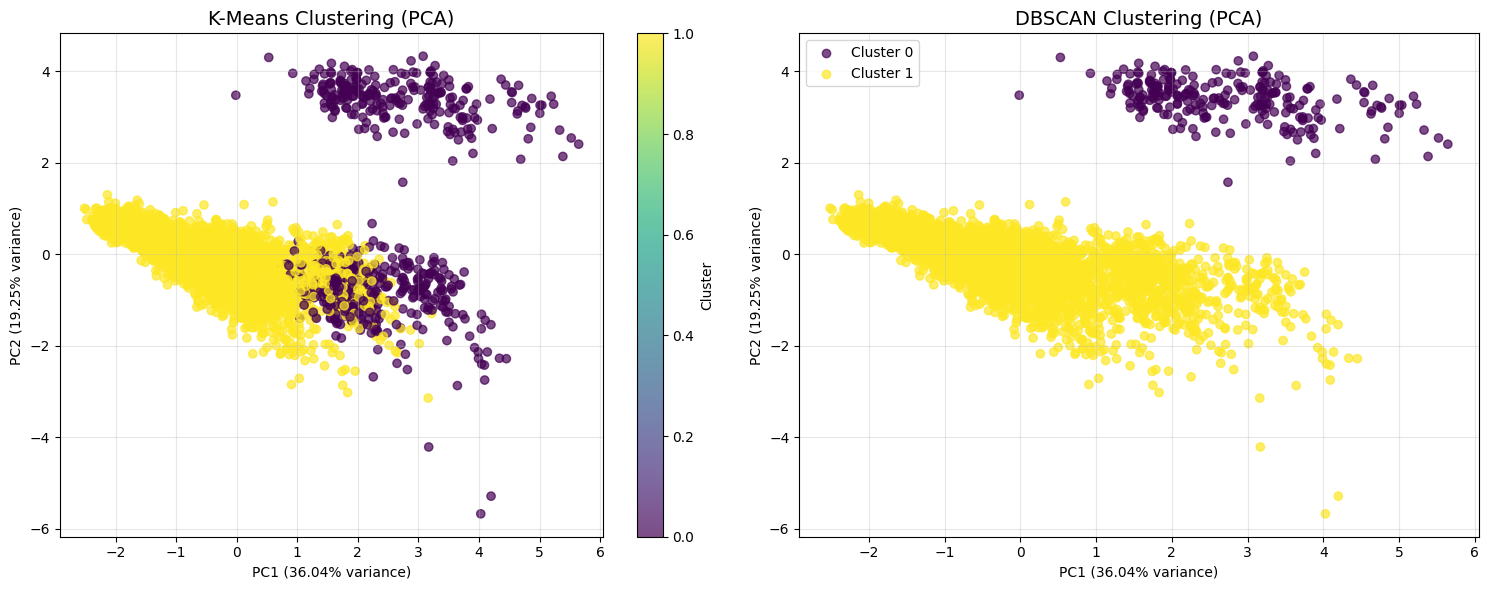

Explained variance ratio PC1: 0.3604
Explained variance ratio PC2: 0.1925
Total explained variance: 0.5530


In [ ]:
# --- VISUALISASI CLUSTER DENGAN PCA ---
# Lakukan PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot K-Means clustering
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_flipped, cmap='viridis', alpha=0.7)
ax1.set_title('K-Means Clustering (PCA)', fontsize=14)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot DBSCAN clustering
# Buat colormap khusus untuk DBSCAN (noise points berwarna hitam)
# Pastikan dbscan_labels juga berasal dari data yang sudah dibersihkan (sama jumlah baris dengan X_scaled)
colors = ['red' if label == -1 else plt.cm.viridis(label / max(dbscan_labels) if max(dbscan_labels) > 0 else 0.5) for label in dbscan_labels] # Tambahkan check for max(dbscan_labels) > 0
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
ax2.set_title('DBSCAN Clustering (PCA)', fontsize=14)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.grid(True, alpha=0.3)

# Tambahkan legend untuk DBSCAN
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        ax2.scatter([], [], c='red', alpha=0.7, label='Noise')
    else:
         # Pastikan label digunakan dengan benar untuk colormap
        ax2.scatter([], [], c=plt.cm.viridis(label / max(dbscan_labels) if max(dbscan_labels) > 0 else 0.5), alpha=0.7, label=f'Cluster {label}') # Tambahkan check for max(dbscan_labels) > 0
ax2.legend()

plt.tight_layout()
plt.show()

# Print informasi PCA
print(f"Explained variance ratio PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Explained variance ratio PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")